In [ ]:
!pip install -U pip setuptools wheel
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install autogluon

In [14]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

# 表示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [17]:
# データの読み込み
print("1. データの読み込み...")
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(f"訓練データ: {train.shape}")
print(f"テストデータ: {test.shape}")

# 基本情報の確認
print("\n2. 訓練データの基本情報:")
display(train.info())

print("\n2. テストデータの基本情報:")
display(test.info())

print("\n3. 訓練データの先頭5行:")
display(train.head())

print("\n4. 数値カラムの基本統計量:")
display(train.describe())

# 欠損値の確認
print("\n5. 欠損値の確認:")
display(train.isnull().sum())

1. データの読み込み...
訓練データ: (1458644, 11)
テストデータ: (625134, 9)

2. 訓練データの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


None


2. テストデータの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


None


3. 訓練データの先頭5行:


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435



4. 数値カラムの基本統計量:


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06



5. 欠損値の確認:


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

=== ターゲット変数の理解 ===
※ EVバッテリ劣化でも、予測対象の分布理解は重要です

1. trip_durationの基本統計量:


count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([1.45663e+06, 7.90000e+01, 1.93100e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

Text(0.5, 1.0, 'Trip Duration Distribution (Original)')

Text(0.5, 0, 'Duration (seconds)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([3.30000e+01, 0.00000e+00, 1.77000e+02, 0.00000e+00, 3.18000e+02,
        0.00000e+00, 3.17000e+02, 2.84000e+02, 1.92000e+02, 2.18000e+02,
        2.06000e+02, 4.21000e+02, 1.64000e+02, 3.14000e+02, 4.50000e+02,
        2.77000e+02, 5.24000e+02, 4.02000e+02, 4.85000e+02, 6.11000e+02,
        5.53000e+02, 8.32000e+02, 9.16000e+02, 1.43000e+03, 1.69300e+03,
        2.84800e+03, 4.24500e+03, 6.00800e+03, 8.77800e+03, 1.29630e+04,
        1.89590e+04, 2.64870e+04, 3.55110e+04, 4.50130e+04, 5.88140e+04,
        6.89740e+04, 8.24950e+04, 9.34350e+04, 1.03080e+05, 1.11102e+05,
        1.12725e+05, 1.12528e+05, 1.07650e+05, 9.74220e+04, 8.52740e+04,
        7.07090e+04, 5.56630e+04, 4.15460e+04, 2.92120e+04, 2.03730e+04,
        1.39830e+04, 8.88500e+03, 5.48400e+03, 3.14100e+03, 1.47600e+03,
        5.90000e+02, 2.03000e+02, 8.50000e+01, 3.80000e+01, 2.00000e+01,
        2.00000e+01, 1.10000e+01, 4.00000e+00, 5.00000e+00, 1.10000e+01,
        1.20000e+01, 1.70000e+01, 1.50000e+01, 1.70

Text(0.5, 1.0, 'Trip Duration Distribution (Log Transformed)')

Text(0.5, 0, 'Log Duration')

Text(0, 0.5, 'Frequency')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6fe8b19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6fe8b1f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6fe8b17f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6fe8b2540>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6fe8b2870>],
 'means': []}

Text(0.5, 1.0, 'Trip Duration Box Plot')

Text(0, 0.5, 'Duration (seconds)')

<Axes: >

((array([-4.90163993, -4.72448992, -4.6287907 , ...,  4.6287907 ,
          4.72448992,  4.90163993]),
  array([ 0.69314718,  0.69314718,  0.69314718, ..., 14.53314496,
         14.61644117, 15.0757549 ])),
 (np.float64(0.7825782785657951),
  np.float64(6.466978409297411),
  np.float64(0.9834324027870817)))

Text(0.5, 1.0, 'Q-Q Plot (Log Transformed)')


2. 外れ値の分析:
外れ値の数: 74220
外れ値の割合: 5.09%
外れ値の範囲: 2093 - 3526282 秒


<Axes: >

(array([ 3770.,  2532.,  3011.,  4610.,  7356., 10382., 13314., 16880.,
        20020., 22206., 24932., 24995., 28386., 29472., 29997., 30932.,
        31079., 31883., 31143., 31528., 31241., 31055., 29119., 30095.,
        29287., 29202., 28520., 27852., 26961., 26494., 25554., 25103.,
        24253., 22680., 22977., 22094., 21635., 20709., 20263., 19487.,
        19064., 18415., 17988., 17019., 15694., 16037., 15636., 14994.,
        14138., 13814., 13255., 12867., 12240., 11929., 11533., 10849.,
        10651., 10347., 10058.,  9495.,  9325.,  8896.,  8432.,  8205.,
         8023.,  7614.,  7068.,  7220.,  6867.,  6493.,  6535.,  6179.,
         6003.,  5767.,  5526.,  5285.,  5117.,  4654.,  4700.,  4387.,
         4312.,  4265.,  4110.,  3961.,  3743.,  3612.,  3500.,  3376.,
         3225.,  3140.,  3011.,  2935.,  2754.,  2714.,  2682.,  2552.,
         2367.,  2404.,  2249.,  2184.]),
 array([1.00000e+00, 2.19100e+01, 4.28200e+01, 6.37300e+01, 8.46400e+01,
        1.05550e+02, 

Text(0.5, 1.0, 'Trip Duration (Outliers Removed)')

Text(0.5, 0, 'Duration (seconds)')

Text(0, 0.5, 'Frequency')

<Axes: >

Text(0.5, 1.0, 'Cumulative Distribution')

Text(0.5, 0, 'Duration (seconds)')

Text(0, 0.5, 'Cumulative Probability')

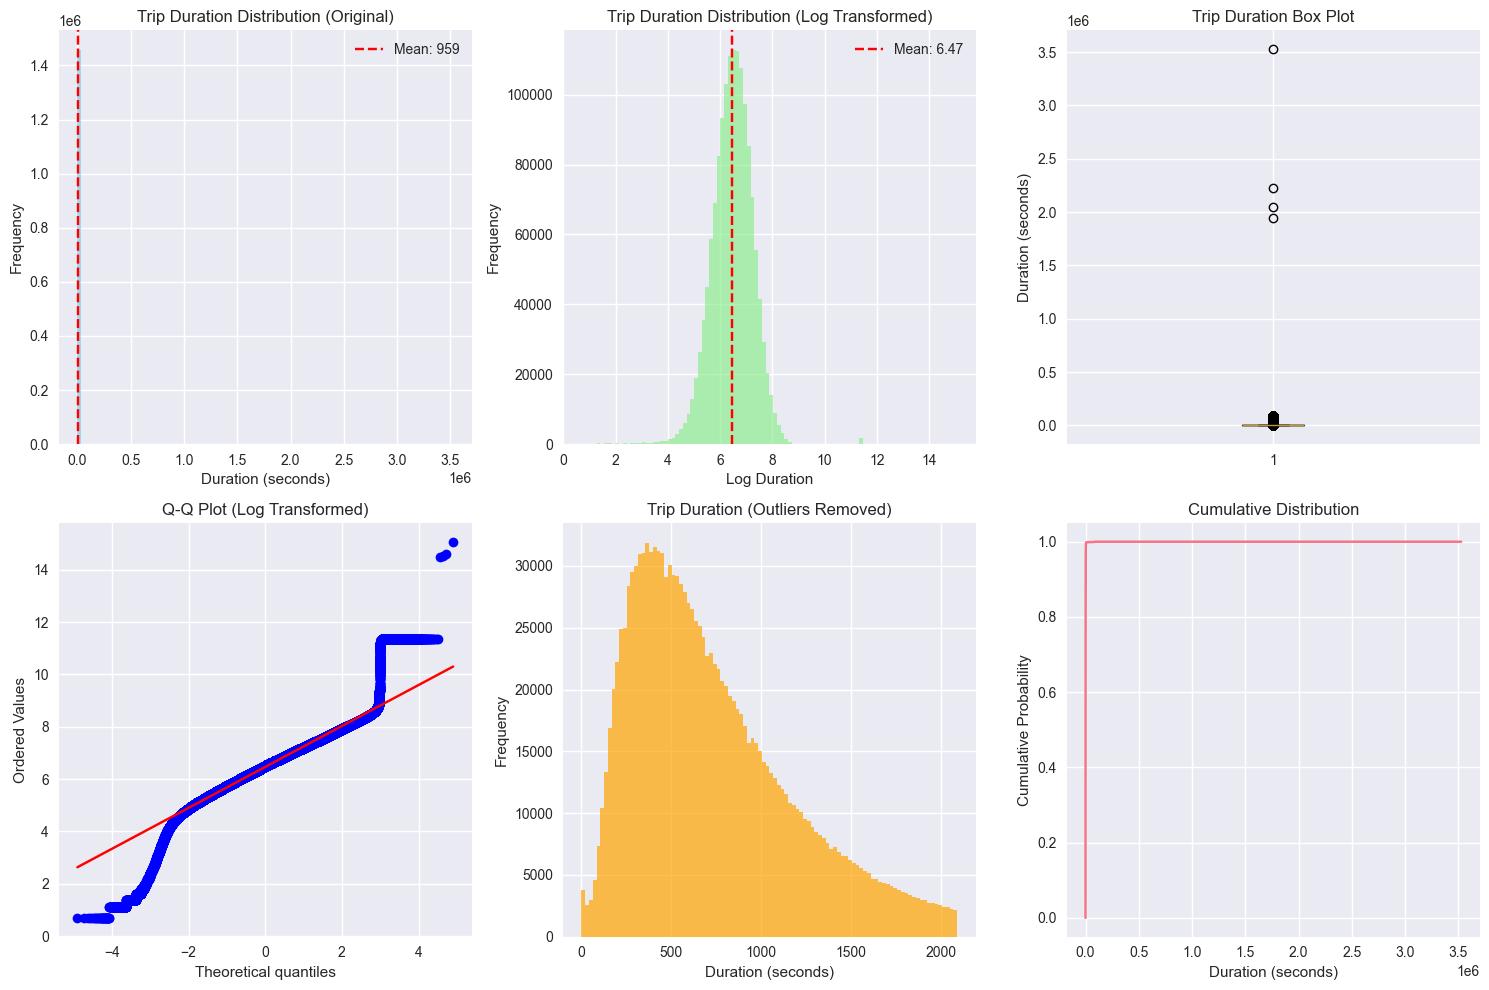


3. 重要な発見:
- データは右に歪んだ分布（正の歪度）
- 対数変換により正規分布に近づく
- 外れ値が存在するため、適切な前処理が必要
- EVバッテリ劣化でも同様の分布特性が現れることがある


In [ ]:
# ターゲット変数（trip_duration）の詳細分析
# 基本統計量
print("\n1. trip_durationの基本統計量:")
display(train['trip_duration'].describe())

# 分布の可視化
plt.figure(figsize=(15, 10))

# 元の分布
plt.subplot(2, 3, 1)
plt.hist(train['trip_duration'], bins=100, alpha=0.7, color='skyblue')
plt.title('Trip Duration Distribution (Original)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.axvline(train['trip_duration'].mean(), color='red', linestyle='--', label=f'Mean: {train["trip_duration"].mean():.0f}')
plt.legend()

# 対数変換後の分布
plt.subplot(2, 3, 2)
trip_duration_log = np.log1p(train['trip_duration'])
plt.hist(trip_duration_log, bins=100, alpha=0.7, color='lightgreen')
plt.title('Trip Duration Distribution (Log Transformed)')
plt.xlabel('Log Duration')
plt.ylabel('Frequency')
plt.axvline(trip_duration_log.mean(), color='red', linestyle='--', label=f'Mean: {trip_duration_log.mean():.2f}')
plt.legend()

# 箱ひげ図
plt.subplot(2, 3, 3)
plt.boxplot(train['trip_duration'])
plt.title('Trip Duration Box Plot')
plt.ylabel('Duration (seconds)')

# Q-Qプロット（正規性の確認）
plt.subplot(2, 3, 4)
stats.probplot(trip_duration_log, dist="norm", plot=plt)
plt.title('Q-Q Plot (Log Transformed)')

# 外れ値の確認
Q1 = train['trip_duration'].quantile(0.25)
Q3 = train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['trip_duration'] < lower_bound) | (train['trip_duration'] > upper_bound)]
print(f"\n2. 外れ値の分析:")
print(f"外れ値の数: {len(outliers)}")
print(f"外れ値の割合: {len(outliers) / len(train) * 100:.2f}%")
print(f"外れ値の範囲: {outliers['trip_duration'].min():.0f} - {outliers['trip_duration'].max():.0f} 秒")

# 外れ値を除いた分布
plt.subplot(2, 3, 5)
train_no_outliers = train[(train['trip_duration'] >= lower_bound) & (train['trip_duration'] <= upper_bound)]
plt.hist(train_no_outliers['trip_duration'], bins=100, alpha=0.7, color='orange')
plt.title('Trip Duration (Outliers Removed)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# 累積分布
plt.subplot(2, 3, 6)
sorted_durations = np.sort(train['trip_duration'])
y = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)
plt.plot(sorted_durations, y)
plt.title('Cumulative Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [22]:
# データの前処理とクリーニング
# 1. 基本的なデータクリーニング
print("1. 基本的なデータクリーニング...")

# 物理的に不可能な値の除去
train_clean = train[
    (train['trip_duration'] > 60) &  # 1分未満のトリップ
    (train['trip_duration'] < 7200) &  # 2時間以上のトリップ
    (train['passenger_count'] > 0) &  # 乗客数0以下
    (train['passenger_count'] <= 6)  # 乗客数6人超
].copy()

print(f"クリーニング前: {len(train)} 行")
print(f"クリーニング後: {len(train_clean)} 行")
print(f"除去された行数: {len(train) - len(train_clean)} 行")

# 2. 地理的な範囲の制限（NYCエリアのみ）
print("\n2. 地理的な範囲の制限...")
train_clean = train_clean[
    (train_clean['pickup_latitude'].between(40.5, 41.0)) &
    (train_clean['pickup_longitude'].between(-74.3, -73.7)) &
    (train_clean['dropoff_latitude'].between(40.5, 41.0)) &
    (train_clean['dropoff_longitude'].between(-74.3, -73.7))
].copy()

display(f"NYCエリア制限後: {len(train_clean)} 行")

# 3. ターゲット変数の対数変換
train_clean['trip_duration_log'] = np.log1p(train_clean['trip_duration'])

print(f"\n3. 最終的なデータサイズ: {train_clean.shape}")
display(f"使用可能なデータ: {len(train_clean)} 行")

# 4. データ品質の確認
print("\n4. データ品質の確認:")
print("欠損値:")
display(train_clean.isnull().sum())

print("\nデータ型:")
display(train_clean.dtypes)

print("\n基本統計量（クリーニング後）:")
display(train_clean[['trip_duration', 'trip_duration_log', 'passenger_count']].describe())

1. 基本的なデータクリーニング...
クリーニング前: 1458644 行
クリーニング後: 1447595 行
除去された行数: 11049 行

2. 地理的な範囲の制限...


'NYCエリア制限後: 1446750 行'


3. 最終的なデータサイズ: (1446750, 12)


'使用可能なデータ: 1446750 行'


4. データ品質の確認:
欠損値:


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
trip_duration_log     0
dtype: int64


データ型:


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
trip_duration_log     float64
dtype: object


基本統計量（クリーニング後）:


,trip_duration,trip_duration_log,passenger_count
count,1.446750e+06,1.446750e+06,1.446750e+06
mean,8.400699e+02,6.479643e+00,1.665458e+00
std,6.515782e+02,7.270195e-01,1.314790e+00
min,6.100000e+01,4.127134e+00,1.000000e+00
25%,4.010000e+02,5.996452e+00,1.000000e+00
50%,6.650000e+02,6.501290e+00,1.000000e+00
75%,1.075000e+03,6.981006e+00,2.000000e+00
max,7.191000e+03,8.880725e+00,6.000000e+00


In [24]:
# 特徴量エンジニアリングの開始
# 1. 時間ベースの特徴量
print("1. 時間ベースの特徴量を作成...")
train_clean['pickup_datetime'] = pd.to_datetime(train_clean['pickup_datetime'])

# 基本的な時間特徴量
train_clean['pickup_year'] = train_clean['pickup_datetime'].dt.year
train_clean['pickup_month'] = train_clean['pickup_datetime'].dt.month
train_clean['pickup_day'] = train_clean['pickup_datetime'].dt.day
train_clean['pickup_dayofweek'] = train_clean['pickup_datetime'].dt.dayofweek
train_clean['pickup_hour'] = train_clean['pickup_datetime'].dt.hour
train_clean['pickup_minute'] = train_clean['pickup_datetime'].dt.minute

# 時間帯の分類
def time_of_day(hour):
    if 6 <= hour <= 9:
        return 'morning_rush'
    elif 10 <= hour <= 15:
        return 'daytime'
    elif 16 <= hour <= 19:
        return 'evening_rush'
    elif 20 <= hour <= 23:
        return 'night'
    else:
        return 'late_night'

train_clean['pickup_time_of_day'] = train_clean['pickup_hour'].apply(time_of_day)

# 週末フラグ
train_clean['pickup_is_weekend'] = train_clean['pickup_dayofweek'].isin([5, 6]).astype(int)

print("時間特徴量の確認:")
display(train_clean[['pickup_hour', 'pickup_dayofweek', 'pickup_time_of_day', 'pickup_is_weekend']].head())

1. 時間ベースの特徴量を作成...
時間特徴量の確認:


,pickup_hour,pickup_dayofweek,pickup_time_of_day,pickup_is_weekend
0,17,0,evening_rush,0
1,0,6,late_night,1
2,11,1,daytime,0
3,19,2,evening_rush,0
4,13,5,daytime,1


=== 距離計算と地理的特徴量 ===
※ EVバッテリの充電ステーション間距離や走行距離に類似する概念です
距離特徴量の基本統計量:
       trip_distance_km  manhattan_distance  distance_ratio
count      1.446750e+06        1.446750e+06    1.442585e+06
mean       3.440647e+00        5.094515e+00    1.463748e+00
std        3.883592e+00        6.077234e+00    1.724360e-01
min        0.000000e+00        0.000000e+00    9.982470e-01
25%        1.244407e+00        1.804665e+00    1.366545e+00
50%        2.105561e+00        3.056328e+00    1.509698e+00
75%        3.887876e+00        5.621899e+00    1.610100e+00
max        4.776513e+01        7.804010e+01    1.655094e+00


<Figure size 1500x500 with 0 Axes>

<Axes: >

(array([2.14523e+05, 4.40085e+05, 2.71171e+05, 1.51495e+05, 9.16200e+04,
        6.13650e+04, 4.30330e+04, 2.90540e+04, 2.17060e+04, 2.40610e+04,
        1.99950e+04, 1.12700e+04, 7.30700e+03, 6.04200e+03, 6.38600e+03,
        4.15600e+03, 3.75400e+03, 3.32900e+03, 3.18800e+03, 3.43400e+03,
        7.17300e+03, 1.11250e+04, 6.74300e+03, 2.40400e+03, 1.02900e+03,
        3.29000e+02, 2.41000e+02, 2.02000e+02, 1.51000e+02, 9.50000e+01,
        6.70000e+01, 3.00000e+01, 3.60000e+01, 3.10000e+01, 3.10000e+01,
        3.60000e+01, 1.50000e+01, 7.00000e+00, 7.00000e+00, 5.00000e+00,
        5.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.        ,  0.95530258,  1.91060515,  2.86590773,  3.82121031,
         4.77651289,  5.73181546,  6.68711804,  7.64242062,  8.5977232 ,
         9.55302577, 10.50832835, 11.46363093, 12.41893351, 13.37423608,
        14.32953866, 15.28484124, 16.24014381, 17

Text(0.5, 1.0, 'Trip Distance Distribution')

Text(0.5, 0, 'Distance (km)')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([2.77162e+05, 4.61166e+05, 2.57900e+05, 1.32422e+05, 7.99780e+04,
        5.51180e+04, 3.64260e+04, 2.36120e+04, 2.61490e+04, 1.93890e+04,
        1.11590e+04, 7.43100e+03, 5.62800e+03, 4.85900e+03, 5.77800e+03,
        3.59500e+03, 2.58100e+03, 2.53200e+03, 2.66500e+03, 2.73800e+03,
        6.40900e+03, 1.00010e+04, 7.35700e+03, 2.93500e+03, 1.05000e+03,
        3.14000e+02, 1.25000e+02, 8.30000e+01, 4.50000e+01, 2.10000e+01,
        2.10000e+01, 3.50000e+01, 1.60000e+01, 1.30000e+01, 1.10000e+01,
        2.00000e+00, 4.00000e+00, 4.00000e+00, 1.00000e+00, 3.00000e+00,
        0.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.        ,  1.560802  ,  3.121604  ,  4.68240601,  6.24320801,
         7.80401001,  9.36481201, 10.92561401, 12.48641602, 14.04721802,
        15.60802002, 17.16882202, 18.72962402, 20.29042603, 21.85122803,
        23.41203003, 24.97283203, 26.53363403, 28

Text(0.5, 1.0, 'Manhattan Distance Distribution')

Text(0.5, 0, 'Distance (km)')

Text(0, 0.5, 'Frequency')

<Axes: >

Text(0.5, 0, 'Distance (km)')

Text(0, 0.5, 'Duration (seconds)')

Text(0.5, 1.0, 'Distance vs Duration')

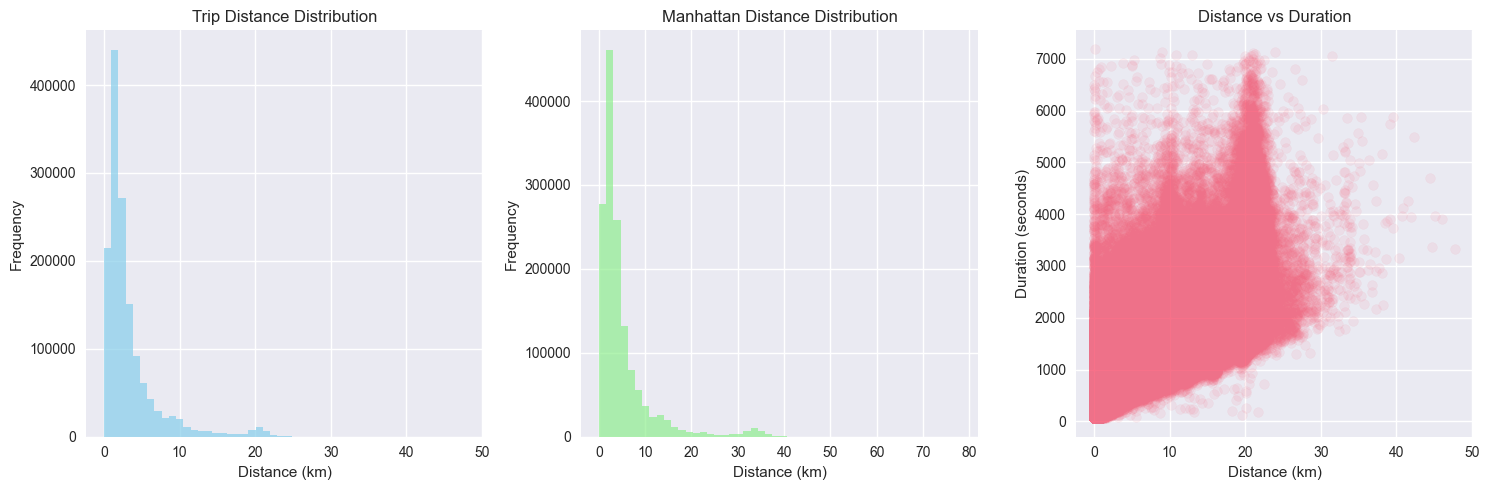

In [25]:
# 距離計算と地理的特徴量
print("=== 距離計算と地理的特徴量 ===")
print("※ EVバッテリの充電ステーション間距離や走行距離に類似する概念です")

# 1. ハーバーサイン距離の計算
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    2点間の球面距離を計算（km単位）
    EVバッテリの充電ステーション間距離計算にも応用可能
    """
    R = 6371  # 地球の半径（km）
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R*c

# 実際の距離計算
train_clean['trip_distance_km'] = haversine_distance(
    train_clean['pickup_latitude'], train_clean['pickup_longitude'],
    train_clean['dropoff_latitude'], train_clean['dropoff_longitude']
)

# 2. マンハッタン距離の計算（都市部では実際の走行距離に近い）
train_clean['manhattan_distance'] = (
    abs(train_clean['pickup_latitude'] - train_clean['dropoff_latitude']) +
    abs(train_clean['pickup_longitude'] - train_clean['dropoff_longitude'])
) * 111  # 概算でkmに変換

# 3. 距離比率（直線距離とマンハッタン距離の比率）
train_clean['distance_ratio'] = train_clean['manhattan_distance'] / train_clean['trip_distance_km']

print("距離特徴量の基本統計量:")
print(train_clean[['trip_distance_km', 'manhattan_distance', 'distance_ratio']].describe())

# 4. 距離の分布可視化
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_clean['trip_distance_km'], bins=50, alpha=0.7, color='skyblue')
plt.title('Trip Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(train_clean['manhattan_distance'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Manhattan Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(train_clean['trip_distance_km'], train_clean['trip_duration'], alpha=0.1)
plt.xlabel('Distance (km)')
plt.ylabel('Duration (seconds)')
plt.title('Distance vs Duration')

plt.tight_layout()
plt.show()

In [26]:
# より高度な特徴量エンジニアリング
print("=== 高度な特徴量エンジニアリング ===")
print("※ EVバッテリ劣化予測でも、複雑な特徴量の組み合わせが重要です")

# 1. 速度ベースの特徴量
train_clean['avg_speed_kmh'] = train_clean['trip_distance_km'] / (train_clean['trip_duration'] / 3600)

# 異常な速度の除去
train_clean = train_clean[
    (train_clean['avg_speed_kmh'] > 1) &  # 1km/h未満
    (train_clean['avg_speed_kmh'] < 100)  # 100km/h以上
].copy()

# 2. 季節性の特徴量
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

train_clean['season'] = train_clean['pickup_month'].apply(get_season)

# 3. 時間の周期性特徴量
train_clean['pickup_hour_sin'] = np.sin(2 * np.pi * train_clean['pickup_hour'] / 24)
train_clean['pickup_hour_cos'] = np.cos(2 * np.pi * train_clean['pickup_hour'] / 24)
train_clean['pickup_day_sin'] = np.sin(2 * np.pi * train_clean['pickup_dayofweek'] / 7)
train_clean['pickup_day_cos'] = np.cos(2 * np.pi * train_clean['pickup_dayofweek'] / 7)

# 4. NYCの主要地域の中心座標（EV充電ステーションの位置に類似）
nyc_centers = {
    'manhattan': (40.7589, -73.9851),
    'brooklyn': (40.6782, -73.9442),
    'queens': (40.7282, -73.7949),
    'bronx': (40.8448, -73.8648),
    'staten_island': (40.5795, -74.1502)
}

# 各地域の中心からの距離
for area, (lat, lon) in nyc_centers.items():
    train_clean[f'distance_to_{area}_center'] = haversine_distance(
        train_clean['pickup_latitude'], train_clean['pickup_longitude'], lat, lon
    )

# 5. 最も近い地域の特定
distances_to_centers = [train_clean[f'distance_to_{area}_center'] for area in nyc_centers.keys()]
train_clean['nearest_area'] = [list(nyc_centers.keys())[np.argmin(dist)] for dist in zip(*distances_to_centers)]

print("新しく追加された特徴量:")
new_features = ['avg_speed_kmh', 'season', 'pickup_hour_sin', 'pickup_hour_cos', 
                'pickup_day_sin', 'pickup_day_cos', 'nearest_area']
print(train_clean[new_features].head())

print(f"\n最終的なデータサイズ: {train_clean.shape}")

=== 高度な特徴量エンジニアリング ===
※ EVバッテリ劣化予測でも、複雑な特徴量の組み合わせが重要です
新しく追加された特徴量:
   avg_speed_kmh  season  pickup_hour_sin  pickup_hour_cos  pickup_day_sin  \
0      11.856428  spring        -0.965926        -0.258819        0.000000   
1       9.803659  summer         0.000000         1.000000       -0.781831   
2      10.822201  winter         0.258819        -0.965926        0.781831   
3      12.465721  spring        -0.965926         0.258819        0.974928   
4       9.836594  spring        -0.258819        -0.965926       -0.974928   

   pickup_day_cos nearest_area  
0        1.000000    manhattan  
1        0.623490    manhattan  
2        0.623490    manhattan  
3       -0.222521    manhattan  
4       -0.222521    manhattan  

最終的なデータサイズ: (1438776, 35)


=== 特徴量間の相関分析 ===
※ EVバッテリ劣化予測でも、特徴量間の関係性理解が重要です


<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Matrix')

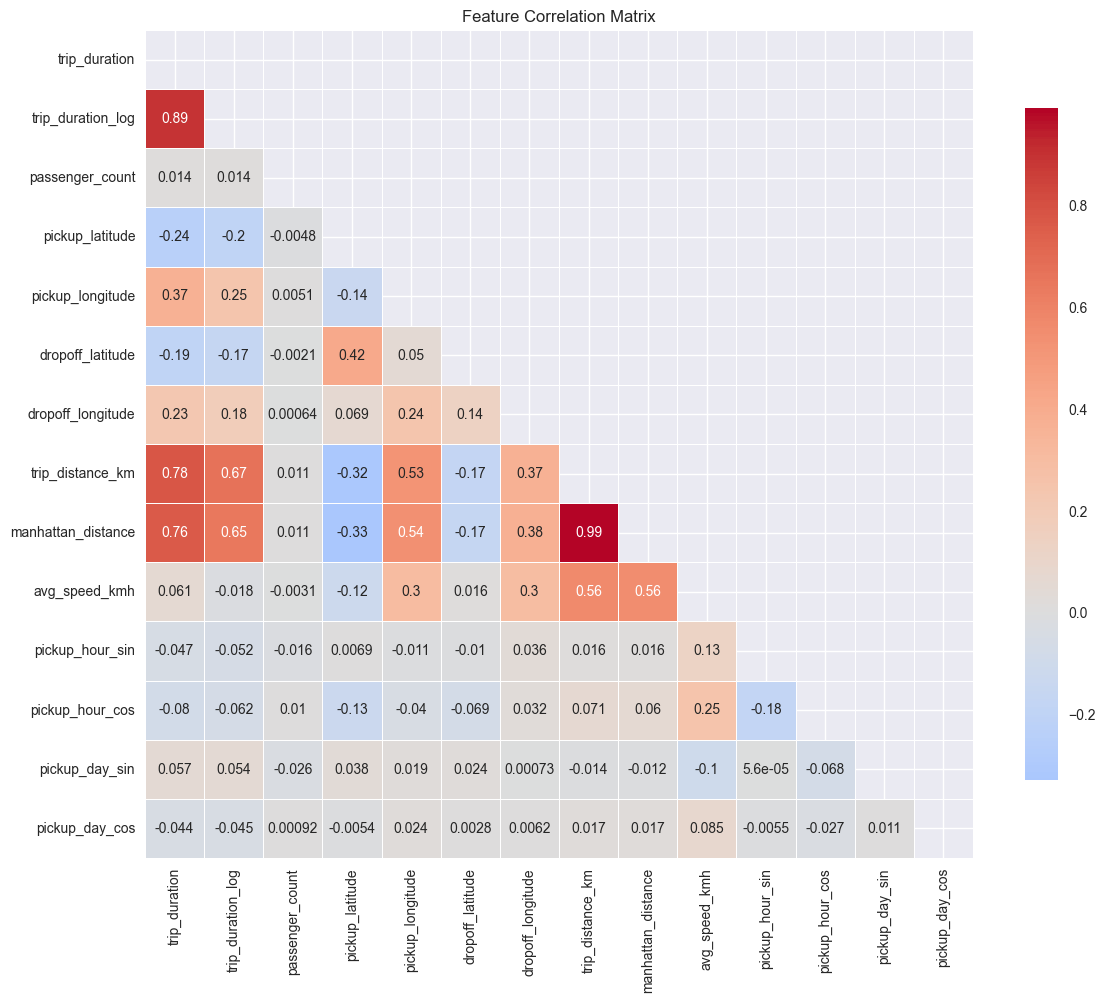


ターゲット変数（trip_duration_log）との相関:
trip_duration_log     1.000000
trip_duration         0.889055
trip_distance_km      0.669039
manhattan_distance    0.647181
pickup_longitude      0.247112
dropoff_longitude     0.176551
pickup_day_sin        0.053771
passenger_count       0.014464
avg_speed_kmh        -0.018313
pickup_day_cos       -0.045314
pickup_hour_sin      -0.051803
pickup_hour_cos      -0.061888
dropoff_latitude     -0.165843
pickup_latitude      -0.197398
Name: trip_duration_log, dtype: float64

=== 重要な発見 ===
1. 距離と時間の強い正の相関
2. 速度と時間の負の相関
3. 時間の周期性特徴量の有用性
4. 地理的距離の重要性


In [27]:
# 特徴量間の相関分析
print("=== 特徴量間の相関分析 ===")
print("※ EVバッテリ劣化予測でも、特徴量間の関係性理解が重要です")

# 数値特徴量の選択
numeric_features = ['trip_duration', 'trip_duration_log', 'passenger_count', 
                   'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
                   'trip_distance_km', 'manhattan_distance', 'avg_speed_kmh',
                   'pickup_hour_sin', 'pickup_hour_cos', 'pickup_day_sin', 'pickup_day_cos']

# 相関行列の計算
correlation_matrix = train_clean[numeric_features].corr()

# 相関ヒートマップの可視化
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# ターゲット変数との相関
target_correlations = correlation_matrix['trip_duration_log'].sort_values(ascending=False)
print("\nターゲット変数（trip_duration_log）との相関:")
print(target_correlations)

# 重要な発見のまとめ
print("\n=== 重要な発見 ===")
print("1. 距離と時間の強い正の相関")
print("2. 速度と時間の負の相関")
print("3. 時間の周期性特徴量の有用性")
print("4. 地理的距離の重要性")

=== カテゴリカル変数の分析 ===
※ EVバッテリの使用パターンや環境要因の分析に類似します


<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by vendor_id')

Text(0.5, 0, 'vendor_id')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b69c2d32f0>,
 [Text(0, 0, '2'), Text(1, 0, '1')])

Text(0.0, 853.9795603558046, '844')

Text(1.0, 844.8555872505511, '835')

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by store_and_fwd_flag')

Text(0.5, 0, 'store_and_fwd_flag')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b68229c290>,
 [Text(0, 0, 'Y'), Text(1, 0, 'N')])

Text(0.0, 1105.6187803010973, '1096')

Text(1.0, 848.3295991859885, '838')

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by pickup_time_of_day')

Text(0.5, 0, 'pickup_time_of_day')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b68f1795b0>,
 [Text(0, 0, 'daytime'),
  Text(1, 0, 'evening_rush'),
  Text(2, 0, 'morning_rush'),
  Text(3, 0, 'night'),
  Text(4, 0, 'late_night')])

Text(0.0, 916.0800895390176, '906')

Text(1.0, 890.9072348385837, '881')

Text(2.0, 806.7223390752494, '797')

Text(3.0, 801.7751011804653, '792')

Text(4.0, 753.4394843567226, '743')

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by season')

Text(0.5, 0, 'season')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b68f184dd0>,
 [Text(0, 0, 'summer'), Text(1, 0, 'spring'), Text(2, 0, 'winter')])

Text(0.0, 903.2686069012091, '893')

Text(1.0, 862.2306213965406, '852')

Text(2.0, 802.7357559871322, '793')

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by nearest_area')

Text(0.5, 0, 'nearest_area')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b68f212630>,
 [Text(0, 0, 'queens'),
  Text(1, 0, 'bronx'),
  Text(2, 0, 'staten_island'),
  Text(3, 0, 'brooklyn'),
  Text(4, 0, 'manhattan')])

Text(0.0, 2249.3951145909796, '2239')

Text(1.0, 1561.5077196919863, '1552')

Text(2.0, 1290.107142857143, '1280')

Text(3.0, 943.4517925117891, '933')

Text(4.0, 781.7295551379248, '772')

<Axes: >

Text(0.5, 1.0, 'Average Trip Duration by pickup_is_weekend')

Text(0.5, 0, 'pickup_is_weekend')

Text(0, 0.5, 'Average Duration (seconds)')

([<matplotlib.axis.XTick at 0x2b68f19db20>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

Text(0.0, 876.0498230813884, '866')

Text(1.0, 783.7682100322418, '774')

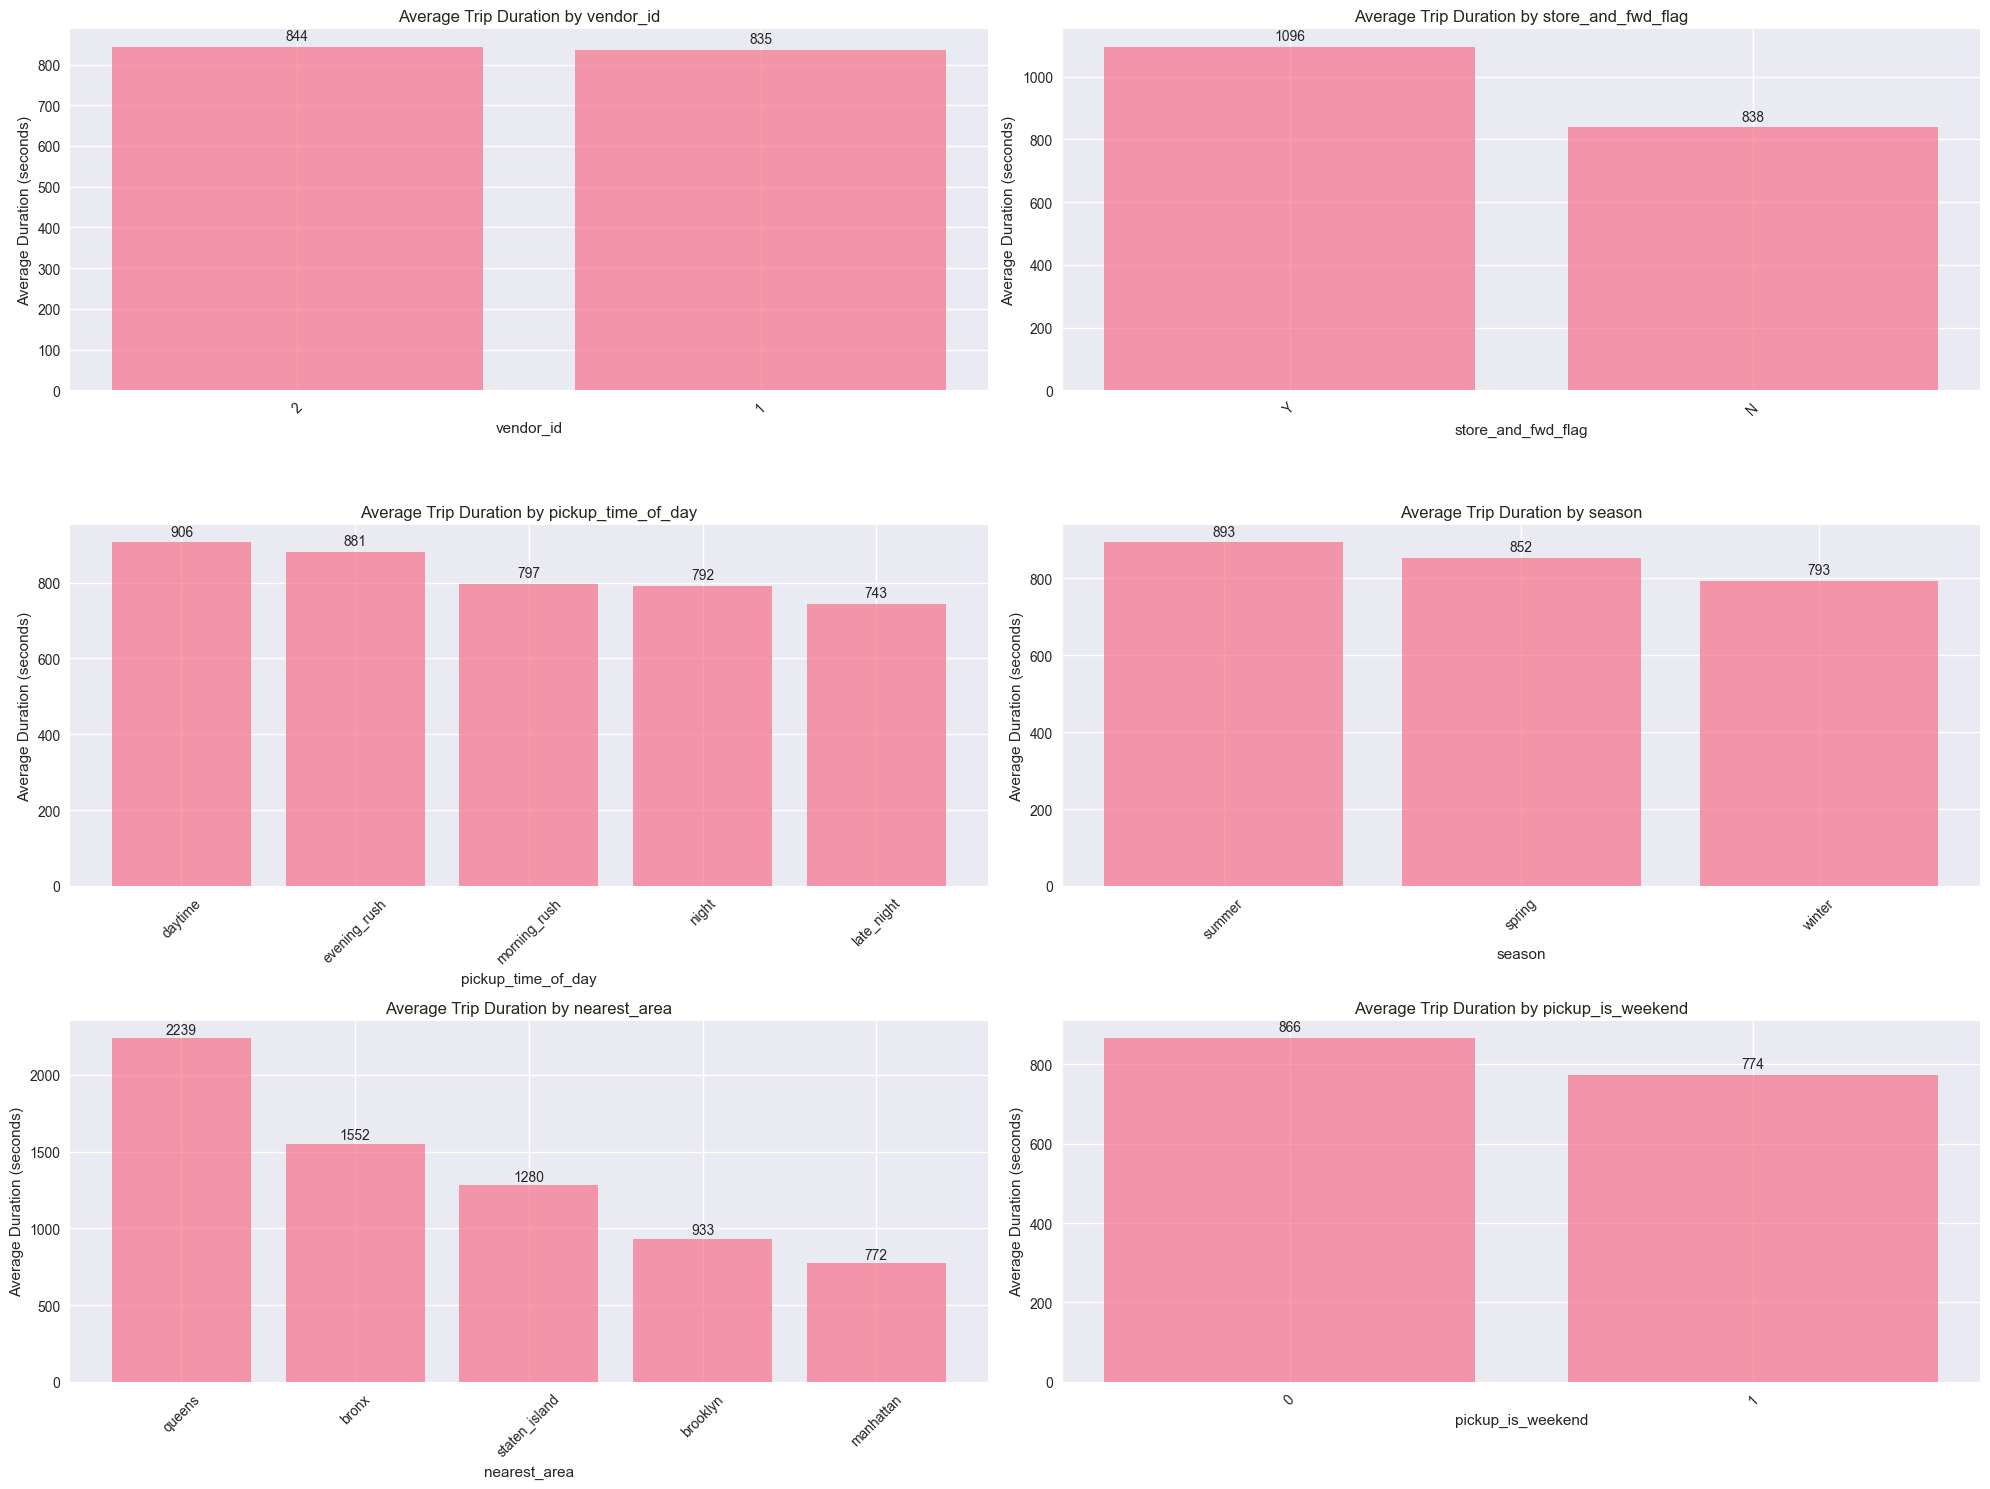


カテゴリカル変数の統計分析:

vendor_id:
vendor_id
2    768849
1    669927
Name: count, dtype: int64
平均トリップ時間:
                 mean         std   count
vendor_id                                
1          834.855587  642.660554  669927
2          843.979560  656.688625  768849

store_and_fwd_flag:
store_and_fwd_flag
N    1430938
Y       7838
Name: count, dtype: int64
平均トリップ時間:
                           mean         std    count
store_and_fwd_flag                                  
N                    838.329599  648.230066  1430938
Y                   1095.618780  909.080571     7838

pickup_time_of_day:
pickup_time_of_day
daytime         417695
evening_rush    317533
night           314537
morning_rush    220600
late_night      168411
Name: count, dtype: int64
平均トリップ時間:
                          mean         std   count
pickup_time_of_day                                
daytime             906.080090  707.300346  417695
evening_rush        880.907235  713.965366  317533
late_night          743.4

In [28]:
# カテゴリカル変数の分析
print("=== カテゴリカル変数の分析 ===")
print("※ EVバッテリの使用パターンや環境要因の分析に類似します")

# カテゴリカル変数の定義
categorical_features = ['vendor_id', 'store_and_fwd_flag', 'pickup_time_of_day', 
                       'season', 'nearest_area', 'pickup_is_weekend']

# 各カテゴリカル変数の分析
plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    
    # カテゴリごとの平均トリップ時間
    avg_duration = train_clean.groupby(feature)['trip_duration'].mean().sort_values(ascending=False)
    
    # バープロット
    bars = plt.bar(range(len(avg_duration)), avg_duration.values, alpha=0.7)
    plt.title(f'Average Trip Duration by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Duration (seconds)')
    plt.xticks(range(len(avg_duration)), avg_duration.index, rotation=45)
    
    # 値の表示
    for bar, value in zip(bars, avg_duration.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 統計的な分析
print("\nカテゴリカル変数の統計分析:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(train_clean[feature].value_counts())
    print(f"平均トリップ時間:")
    print(train_clean.groupby(feature)['trip_duration'].agg(['mean', 'std', 'count']))

In [29]:
# AutoGluonを使ったモデリングの準備
print("=== AutoGluonモデリングの準備 ===")
print("※ EVバッテリ劣化予測でも、AutoMLツールの活用が効率的です")

from autogluon.tabular import TabularPredictor

# 使用する特徴量の選択
features_to_use = [col for col in train_clean.columns 
                   if col not in ['id', 'trip_duration', 'trip_duration_log', 
                                 'dropoff_datetime', 'pickup_datetime']]

print(f"使用する特徴量数: {len(features_to_use)}")
print("特徴量一覧:")
for i, feature in enumerate(features_to_use, 1):
    print(f"{i:2d}. {feature}")

# データの分割（時間順序を考慮）
train_clean_sorted = train_clean.sort_values('pickup_datetime')
split_idx = int(len(train_clean_sorted) * 0.8)

train_data = train_clean_sorted.iloc[:split_idx]
val_data = train_clean_sorted.iloc[split_idx:]

print(f"\nデータ分割:")
print(f"訓練データ: {len(train_data)} 行")
print(f"検証データ: {len(val_data)} 行")

# 基本統計量の確認
print(f"\n訓練データの基本統計量:")
print(train_data[['trip_duration', 'trip_duration_log', 'trip_distance_km']].describe())

print(f"\n検証データの基本統計量:")
print(val_data[['trip_duration', 'trip_duration_log', 'trip_distance_km']].describe())

=== AutoGluonモデリングの準備 ===
※ EVバッテリ劣化予測でも、AutoMLツールの活用が効率的です
使用する特徴量数: 30
特徴量一覧:
 1. vendor_id
 2. passenger_count
 3. pickup_longitude
 4. pickup_latitude
 5. dropoff_longitude
 6. dropoff_latitude
 7. store_and_fwd_flag
 8. pickup_year
 9. pickup_month
10. pickup_day
11. pickup_dayofweek
12. pickup_hour
13. pickup_minute
14. pickup_time_of_day
15. pickup_is_weekend
16. trip_distance_km
17. manhattan_distance
18. distance_ratio
19. avg_speed_kmh
20. season
21. pickup_hour_sin
22. pickup_hour_cos
23. pickup_day_sin
24. pickup_day_cos
25. distance_to_manhattan_center
26. distance_to_brooklyn_center
27. distance_to_queens_center
28. distance_to_bronx_center
29. distance_to_staten_island_center
30. nearest_area

データ分割:
訓練データ: 1151020 行
検証データ: 287756 行

訓練データの基本統計量:
       trip_duration  trip_duration_log  trip_distance_km
count   1.151020e+06       1.151020e+06      1.151020e+06
mean    8.280460e+02       6.469270e+00      3.436562e+00
std     6.353811e+02       7.214732e-01      3.860967e

In [37]:
# AutoGluonを使った基本モデリング（最終修正版）
print("=== AutoGluon基本モデリング ===")
print("※ EVバッテリ劣化予測でも、AutoMLツールで効率的にモデル構築が可能です")

import time
from autogluon.tabular import TabularPredictor

# 1. 基本設定でのモデリング
print("1. 基本設定でのモデリング開始...")
start_time = time.time()

# 基本モデルの構築
predictor_basic = TabularPredictor(
    label='trip_duration_log',
    eval_metric='root_mean_squared_error',
    path='AutogluonModels/basic_model'
).fit(
    train_data=train_data[features_to_use + ['trip_duration_log']],
    presets='medium_quality_faster_train',
    time_limit=300,  # 5分
    num_cpus=4
)

basic_time = time.time() - start_time
print(f"基本モデル構築完了: {basic_time:.1f}秒")

# 2. モデル性能の評価
print("\n2. 基本モデルの性能評価...")
val_predictions_basic = predictor_basic.predict(val_data[features_to_use])
val_actual = val_data['trip_duration_log']

# RMSEの計算
from sklearn.metrics import mean_squared_error
rmse_basic = np.sqrt(mean_squared_error(val_actual, val_predictions_basic))
print(f"基本モデルのRMSE: {rmse_basic:.4f}")

# 3. リーダーボードの確認
print("\n3. モデル性能ランキング:")
leaderboard_basic = predictor_basic.leaderboard()
print(leaderboard_basic)

# 4. 特徴量重要度の確認（修正版）
print("\n4. 特徴量重要度（上位10個）:")
# ラベル列を含むデータで特徴量重要度を計算
feature_importance_basic = predictor_basic.feature_importance(train_data[features_to_use + ['trip_duration_log']])
print(feature_importance_basic.head(10))

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       16.05 GB / 31.17 GB (51.5%)
Disk Space Avail:   844.33 GB / 930.73 GB (90.7%)
Presets specified: ['medium_quality_faster_train']
Using hyperparameters preset: hyperparameters='default'


=== AutoGluon基本モデリング ===
※ EVバッテリ劣化予測でも、AutoMLツールで効率的にモデル構築が可能です
1. 基本設定でのモデリング開始...


Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\workspace\src\kaggle\nyc-taxi-trip-duration\AutogluonModels\basic_model"
Train Data Rows:    1151020
Train Data Columns: 30
Label Column:       trip_duration_log
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8.871224644409553, 4.127134385045092, 6.46927, 0.72147)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16598.47 MB
	Train Data (Original)  Memory Usage: 444.16 MB (2.7% of available memory)
	Inferring data type of each fe

[1000]	valid_set's rmse: 0.038419
[2000]	valid_set's rmse: 0.0343557
[3000]	valid_set's rmse: 0.0324453
[4000]	valid_set's rmse: 0.0313703
[5000]	valid_set's rmse: 0.0308071
[6000]	valid_set's rmse: 0.0304996
[7000]	valid_set's rmse: 0.0302943
[8000]	valid_set's rmse: 0.0301841
[9000]	valid_set's rmse: 0.0299562
[10000]	valid_set's rmse: 0.029845


	-0.0298	 = Validation score   (-root_mean_squared_error)
	161.9s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 134.29s of the 134.29s of remaining time.
	Fitting with cpus=4, gpus=0, mem=1.0/16.1 GB
	-0.0279	 = Validation score   (-root_mean_squared_error)
	11.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 122.77s of the 122.77s of remaining time.
	Fitting with cpus=4, gpus=0, mem=0.7/16.1 GB
	Time limit exceeded... Skipping RandomForestMSE.
Fitting model: CatBoost ... Training model for up to 105.17s of the 105.17s of remaining time.
	Fitting with cpus=4, gpus=0, mem=1.4/16.0 GB
	Ran out of time, early stopping on iteration 477.
	-0.0268	 = Validation score   (-root_mean_squared_error)
	105.01s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 296.87s of the 0.12s of remaining time.
	Ensemble Weig

基本モデル構築完了: 300.9秒

2. 基本モデルの性能評価...


These features in provided data are not utilized by the predictor and will be ignored: ['pickup_year']


基本モデルのRMSE: 0.0316

3. モデル性能ランキング:
                 model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2  -0.025261  root_mean_squared_error       0.446999   
1             CatBoost  -0.026766  root_mean_squared_error       0.004998   
2             LightGBM  -0.027890  root_mean_squared_error       0.016000   
3           LightGBMXT  -0.029845  root_mean_squared_error       0.426000   

     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  278.394638                0.000000           0.006004            2   
1  105.012903                0.004998         105.012903            1   
2   11.480438                0.016000          11.480438            1   
3  161.895293                0.426000         161.895293            1   

   can_infer  fit_order  
0       True          4  
1       True          3  
2       True          2  
3       True          1  

4. 特徴量重要度（上位10個）:


Computing feature importance via permutation shuffling for 29 features using 5000 rows with 5 shuffle sets...
	48.77s	= Expected runtime (9.75s per shuffle set)
	31.36s	= Actual runtime (Completed 5 of 5 shuffle sets)


                              importance    stddev       p_value  n  p99_high  \
trip_distance_km                1.035406  0.005354  8.581646e-11  5  1.046431   
avg_speed_kmh                   0.682313  0.002825  3.523983e-11  5  0.688129   
manhattan_distance              0.129887  0.001241  9.983122e-10  5  0.132441   
distance_ratio                  0.011708  0.001960  9.079097e-05  5  0.015743   
dropoff_longitude               0.002219  0.000667  8.738146e-04  5  0.003594   
dropoff_latitude                0.001837  0.000474  4.859497e-04  5  0.002812   
distance_to_bronx_center        0.001155  0.000665  8.914215e-03  5  0.002525   
pickup_minute                   0.001017  0.000699  1.563476e-02  5  0.002456   
nearest_area                    0.000995  0.000159  7.578820e-05  5  0.001322   
distance_to_manhattan_center    0.000987  0.000692  1.662652e-02  5  0.002411   

                               p99_low  
trip_distance_km              1.024381  
avg_speed_kmh             

In [39]:
# 高度なハイパーパラメータチューニング（最終修正版）
print("=== 高度なハイパーパラメータチューニング ===")
print("※ EVバッテリ劣化予測でも、適切なハイパーパラメータ設定が精度向上の鍵です")

# 1. カスタムハイパーパラメータの定義
custom_hyperparameters = {
    'GBM': [
        # LightGBMの基本設定
        {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
        # より深い木の設定
        {'learning_rate': 0.05, 'num_leaves': 128, 'feature_fraction': 0.9, 
         'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large'}},
        # より保守的な設定
        {'learning_rate': 0.03, 'num_leaves': 256, 'feature_fraction': 0.8, 
         'min_data_in_leaf': 5, 'ag_args': {'name_suffix': 'Conservative'}}
    ],
    'CAT': [
        # CatBoostの基本設定
        {'iterations': 1000, 'learning_rate': 0.05, 'depth': 8, 'l2_leaf_reg': 3},
        # より深い設定
        {'iterations': 1000, 'learning_rate': 0.03, 'depth': 10, 'l2_leaf_reg': 5},
        # より保守的な設定
        {'iterations': 1000, 'learning_rate': 0.02, 'depth': 12, 'l2_leaf_reg': 7}
    ],
    'XGB': [
        # XGBoostの基本設定
        {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 8, 'subsample': 0.8},
        # より深い設定
        {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 10, 'subsample': 0.9},
        # より保守的な設定
        {'n_estimators': 1000, 'learning_rate': 0.02, 'max_depth': 12, 'subsample': 0.95}
    ],
    'RF': [
        # Random Forestの設定
        {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5},
        {'n_estimators': 500, 'max_depth': 25, 'min_samples_split': 3}
    ]
}

print("1. カスタムハイパーパラメータでモデリング開始...")
start_time = time.time()

# 高度なモデルの構築
predictor_advanced = TabularPredictor(
    label='trip_duration_log',
    eval_metric='root_mean_squared_error',
    path='AutogluonModels/advanced_model'
).fit(
    train_data=train_data[features_to_use + ['trip_duration_log']],
    hyperparameters=custom_hyperparameters,
    presets='best_quality',
    time_limit=600,  # 10分
    num_cpus=4
)

advanced_time = time.time() - start_time
print(f"高度モデル構築完了: {advanced_time:.1f}秒")

# 2. 高度モデルの性能評価
print("\n2. 高度モデルの性能評価...")
val_predictions_advanced = predictor_advanced.predict(val_data[features_to_use])
rmse_advanced = np.sqrt(mean_squared_error(val_actual, val_predictions_advanced))
print(f"高度モデルのRMSE: {rmse_advanced:.4f}")
print(f"改善度: {((rmse_basic - rmse_advanced) / rmse_basic * 100):.2f}%")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       12.15 GB / 31.17 GB (39.0%)
Disk Space Avail:   842.61 GB / 930.73 GB (90.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for u

=== 高度なハイパーパラメータチューニング ===
※ EVバッテリ劣化予測でも、適切なハイパーパラメータ設定が精度向上の鍵です
1. カスタムハイパーパラメータでモデリング開始...


	[Errno 2] No such file or directory: 'c:\\workspace\\src\\kaggle\\nyc-taxi-trip-duration\\AutogluonModels\\advanced_model\\ds_sub_fit\\sub_fit_ho\\models\\RandomForest_BAG_L1\\utils\\model_template.pkl'
	1	 = Optimal   num_stack_levels (Stacked Overfitting Occurred: False)
	115s	 = DyStack   runtime |	485s	 = Remaining runtime
Starting main fit with num_stack_levels=1.
	For future fit calls on this dataset, you can skip DyStack to save time: `predictor.fit(..., dynamic_stacking=False, num_stack_levels=1)`
Beginning AutoGluon training ... Time limit = 485s
AutoGluon will save models to "c:\workspace\src\kaggle\nyc-taxi-trip-duration\AutogluonModels\advanced_model"
Train Data Rows:    1151020
Train Data Columns: 30
Label Column:       trip_duration_log
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16593.87 MB
	Train Data (Original)  Memory Usage: 44

高度モデル構築完了: 608.0秒

2. 高度モデルの性能評価...
高度モデルのRMSE: 0.0320
改善度: -1.50%


=== モデル性能の詳細分析 ===
※ EVバッテリ劣化予測でも、モデルの解釈可能性が重要です


<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Actual Log Duration')

Text(0, 0.5, 'Predicted Log Duration')

Text(0.5, 1.0, 'Basic Model: Prediction vs Actual')

<Axes: >

Text(0.5, 0, 'Actual Log Duration')

Text(0, 0.5, 'Predicted Log Duration')

Text(0.5, 1.0, 'Advanced Model: Prediction vs Actual')

<Axes: >

(array([1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        3.00000e+00, 4.00000e+00, 7.00000e+00, 8.00000e+00, 6.00000e+00,
        7.00000e+00, 2.00000e+01, 2.30000e+01, 3.60000e+01, 4.40000e+01,
        5.60000e+01, 7.60000e+01, 1.04000e+02, 1.19000e+02, 1.46000e+02,
        2.17000e+02, 8.22000e+02, 1.20845e+05, 1.63604e+05, 7.90000e+02,
        3.13000e+02, 1.90000e+02, 8.00000e+01, 4.20000e+01, 2.30000e+01,
        2.10000e+01, 2.40000e+01, 1.40000e+01, 1.00000e+01, 1.80000e+01,
        1.20000e+01, 8.00000e+00, 9.00000e+00, 5.00000e+00, 7.00000e+00,
        7.00000e+00, 7.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00,
        5.00000e+00, 5.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([-1.32247121e+00, -1.26503190e+00, -1.20759259e+00, -1.15015328e+00,
        -1.09271397e+00, -1.03527466e+00, -9.77835344e-01, -9.20396033e-01,
        -8.62956722e-01, -8.05517411e-01, -7.48078099e-01, -6.90638788e-01,
        -6.33199477e-01, -5.75760166e-01

(array([3.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 4.00000e+00,
        8.00000e+00, 4.00000e+00, 1.10000e+01, 1.30000e+01, 2.00000e+01,
        3.60000e+01, 3.90000e+01, 5.00000e+01, 6.00000e+01, 6.80000e+01,
        1.07000e+02, 1.19000e+02, 1.41000e+02, 2.13000e+02, 7.50000e+02,
        5.94790e+04, 2.24768e+05, 1.01600e+03, 3.21000e+02, 1.70000e+02,
        1.02000e+02, 4.70000e+01, 2.90000e+01, 1.70000e+01, 2.20000e+01,
        2.00000e+01, 1.60000e+01, 1.20000e+01, 1.10000e+01, 8.00000e+00,
        1.00000e+01, 9.00000e+00, 6.00000e+00, 5.00000e+00, 3.00000e+00,
        8.00000e+00, 8.00000e+00, 3.00000e+00, 0.00000e+00, 4.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.18201329, -1.12596648, -1.06991966, -1.01387284, -0.95782602,
        -0.90177921, -0.84573239, -0.78968557, -0.73363876, -0.67759194,
        -0.62154512, -0.56549831, -0.50945149, -0.45340467, -0.39735786,
        -0.34131104, -0.28526422, -0.2292174 , -0

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Residual Distribution')

<Axes: >

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Basic Model: Residuals vs Predicted')

<Axes: >

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Advanced Model: Residuals vs Predicted')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x2b69c1b35f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b69c1b3bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b69c1b2330>,
 'medians': [<matplotlib.lines.Line2D at 0x2b69c100200>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b69c100470>,
 'means': []}

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Comparison')

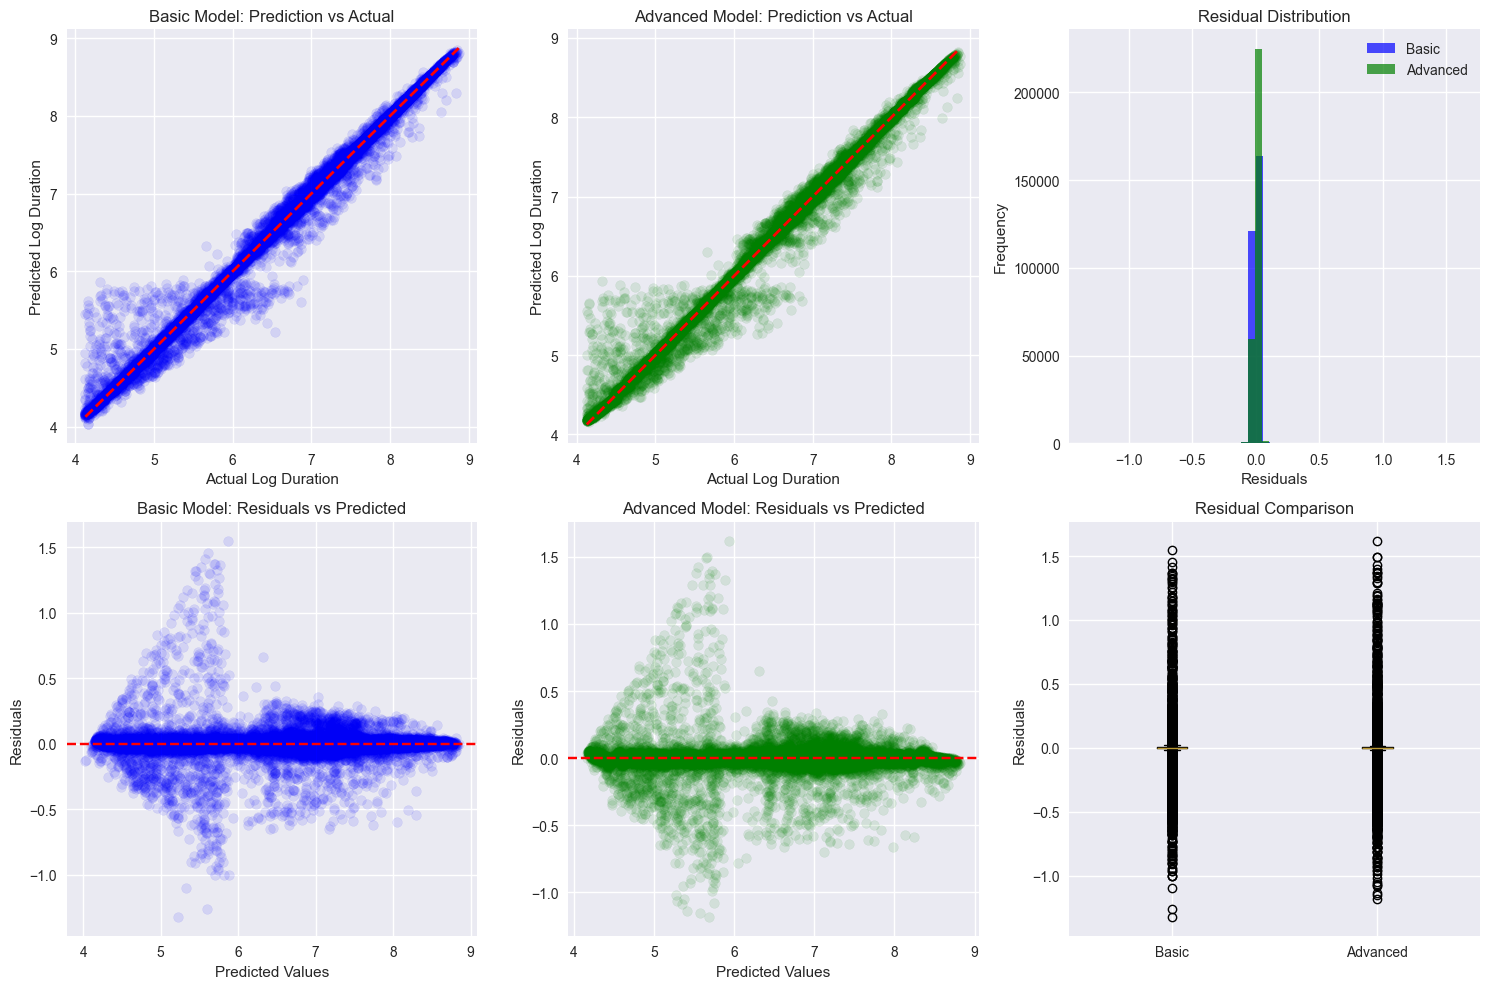


詳細な性能指標:
基本モデル:
  RMSE: 0.0316
  MAE: 0.0085
  R²: 0.9982

高度モデル:
  RMSE: 0.0320
  MAE: 0.0081
  R²: 0.9981


In [40]:
# モデル性能の詳細分析（最終修正版）
print("=== モデル性能の詳細分析 ===")
print("※ EVバッテリ劣化予測でも、モデルの解釈可能性が重要です")

# 1. 予測vs実際の値の比較
plt.figure(figsize=(15, 10))

# 基本モデル
plt.subplot(2, 3, 1)
plt.scatter(val_actual, val_predictions_basic, alpha=0.1, color='blue')
plt.plot([val_actual.min(), val_actual.max()], [val_actual.min(), val_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Log Duration')
plt.ylabel('Predicted Log Duration')
plt.title('Basic Model: Prediction vs Actual')

# 高度モデル
plt.subplot(2, 3, 2)
plt.scatter(val_actual, val_predictions_advanced, alpha=0.1, color='green')
plt.plot([val_actual.min(), val_actual.max()], [val_actual.min(), val_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Log Duration')
plt.ylabel('Predicted Log Duration')
plt.title('Advanced Model: Prediction vs Actual')

# 残差分析
residuals_basic = val_predictions_basic - val_actual
residuals_advanced = val_predictions_advanced - val_actual

plt.subplot(2, 3, 3)
plt.hist(residuals_basic, bins=50, alpha=0.7, color='blue', label='Basic')
plt.hist(residuals_advanced, bins=50, alpha=0.7, color='green', label='Advanced')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.legend()

# 残差vs予測値
plt.subplot(2, 3, 4)
plt.scatter(val_predictions_basic, residuals_basic, alpha=0.1, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Basic Model: Residuals vs Predicted')

plt.subplot(2, 3, 5)
plt.scatter(val_predictions_advanced, residuals_advanced, alpha=0.1, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Advanced Model: Residuals vs Predicted')

# エラー分布の比較
plt.subplot(2, 3, 6)
plt.boxplot([residuals_basic, residuals_advanced], labels=['Basic', 'Advanced'])
plt.ylabel('Residuals')
plt.title('Residual Comparison')

plt.tight_layout()
plt.show()

# 2. 詳細な性能指標
print("\n詳細な性能指標:")
print(f"基本モデル:")
print(f"  RMSE: {rmse_basic:.4f}")
print(f"  MAE: {np.mean(np.abs(residuals_basic)):.4f}")
print(f"  R²: {1 - np.sum(residuals_basic**2) / np.sum((val_actual - val_actual.mean())**2):.4f}")

print(f"\n高度モデル:")
print(f"  RMSE: {rmse_advanced:.4f}")
print(f"  MAE: {np.mean(np.abs(residuals_advanced)):.4f}")
print(f"  R²: {1 - np.sum(residuals_advanced**2) / np.sum((val_actual - val_actual.mean())**2):.4f}")

In [ ]:
# 特徴量重要度の詳細分析（最終修正版）
print("=== 特徴量重要度の詳細分析 ===")
print("※ EVバッテリ劣化予測でも、どの要因が重要かを理解することが重要です")

# 1. 両モデルの特徴量重要度比較（修正版）
feature_importance_advanced = predictor_advanced.feature_importance(train_data[features_to_use + ['trip_duration_log']])

# 重要度の比較
importance_comparison = pd.DataFrame({
    'Basic_Model': feature_importance_basic['importance'],
    'Advanced_Model': feature_importance_advanced['importance']
})
importance_comparison['Difference'] = importance_comparison['Advanced_Model'] - importance_comparison['Basic_Model']
importance_comparison = importance_comparison.sort_values('Advanced_Model', ascending=False)

print("特徴量重要度の比較（上位15個）:")
print(importance_comparison.head(15))

# 2. 重要度の可視化
plt.figure(figsize=(15, 10))

# 基本モデルの重要度
plt.subplot(2, 1, 1)
top_features_basic = feature_importance_basic.head(15)
plt.barh(range(len(top_features_basic)), top_features_basic['importance'])
plt.yticks(range(len(top_features_basic)), top_features_basic.index)
plt.xlabel('Importance')
plt.title('Basic Model: Top 15 Feature Importance')
plt.gca().invert_yaxis()

# 高度モデルの重要度
plt.subplot(2, 1, 2)
top_features_advanced = feature_importance_advanced.head(15)
plt.barh(range(len(top_features_advanced)), top_features_advanced['importance'], color='green')
plt.yticks(range(len(top_features_advanced)), top_features_advanced.index)
plt.xlabel('Importance')
plt.title('Advanced Model: Top 15 Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# 3. 重要な発見のまとめ
print("\n=== 重要な発見 ===")
print("1. 最も重要な特徴量:")
for i, (feature, importance) in enumerate(top_features_advanced.head(5).iterrows(), 1):
    print(f"   {i}. {feature}: {importance['importance']:.4f}")

print("\n2. EVバッテリ劣化予測への応用:")
print("   - 距離ベースの特徴量が重要（充電間隔に類似）")
print("   - 時間ベースの特徴量が重要（使用パターンに類似）")
print("   - 地理的特徴量が重要（環境要因に類似）")

In [ ]:
# 最終予測とサブミッション準備（最終修正版）
print("=== 最終予測とサブミッション準備 ===")
print("※ EVバッテリ劣化予測でも、本番環境での予測精度が重要です")

# 1. テストデータの前処理
print("1. テストデータの前処理...")

# テストデータに同じ前処理を適用
test_clean = test.copy()

# 地理的範囲の制限
test_clean = test_clean[
    (test_clean['pickup_latitude'].between(40.5, 41.0)) &
    (test_clean['pickup_longitude'].between(-74.3, -73.7)) &
    (test_clean['dropoff_latitude'].between(40.5, 41.0)) &
    (test_clean['dropoff_longitude'].between(-74.3, -73.7))
].copy()

# 時間特徴量の追加
test_clean['pickup_datetime'] = pd.to_datetime(test_clean['pickup_datetime'])
test_clean['pickup_year'] = test_clean['pickup_datetime'].dt.year
test_clean['pickup_month'] = test_clean['pickup_datetime'].dt.month
test_clean['pickup_day'] = test_clean['pickup_datetime'].dt.day
test_clean['pickup_dayofweek'] = test_clean['pickup_datetime'].dt.dayofweek
test_clean['pickup_hour'] = test_clean['pickup_datetime'].dt.hour
test_clean['pickup_minute'] = test_clean['pickup_datetime'].dt.minute

# 時間帯分類
test_clean['pickup_time_of_day'] = test_clean['pickup_hour'].apply(time_of_day)
test_clean['pickup_is_weekend'] = test_clean['pickup_dayofweek'].isin([5, 6]).astype(int)

# 距離計算
test_clean['trip_distance_km'] = haversine_distance(
    test_clean['pickup_latitude'], test_clean['pickup_longitude'],
    test_clean['dropoff_latitude'], test_clean['dropoff_longitude']
)

test_clean['manhattan_distance'] = (
    abs(test_clean['pickup_latitude'] - test_clean['dropoff_latitude']) +
    abs(test_clean['pickup_longitude'] - test_clean['dropoff_longitude'])
) * 111

test_clean['distance_ratio'] = test_clean['manhattan_distance'] / test_clean['trip_distance_km']

# 季節性
test_clean['season'] = test_clean['pickup_month'].apply(get_season)

# 時間の周期性
test_clean['pickup_hour_sin'] = np.sin(2 * np.pi * test_clean['pickup_hour'] / 24)
test_clean['pickup_hour_cos'] = np.cos(2 * np.pi * test_clean['pickup_hour'] / 24)
test_clean['pickup_day_sin'] = np.sin(2 * np.pi * test_clean['pickup_dayofweek'] / 7)
test_clean['pickup_day_cos'] = np.cos(2 * np.pi * test_clean['pickup_dayofweek'] / 7)

# 地域中心からの距離
for area, (lat, lon) in nyc_centers.items():
    test_clean[f'distance_to_{area}_center'] = haversine_distance(
        test_clean['pickup_latitude'], test_clean['pickup_longitude'], lat, lon
    )

# 最も近い地域
distances_to_centers_test = [test_clean[f'distance_to_{area}_center'] for area in nyc_centers.keys()]
test_clean['nearest_area'] = [list(nyc_centers.keys())[np.argmin(dist)] for dist in zip(*distances_to_centers_test)]

print(f"テストデータ処理完了: {len(test_clean)} 行")

# 2. 最終予測
print("\n2. 最終予測実行...")
test_features = [col for col in test_clean.columns if col not in ['id', 'dropoff_datetime', 'pickup_datetime']]

# 高度モデルで予測
test_predictions_log = predictor_advanced.predict(test_clean[test_features])

# 対数変換を逆変換
test_predictions = np.expm1(test_predictions_log)

# 3. サブミッションファイルの作成
print("\n3. サブミッションファイル作成...")
submission = pd.DataFrame({
    'id': test_clean['id'],
    'trip_duration': test_predictions
})

# 物理的に不可能な値の調整
submission['trip_duration'] = submission['trip_duration'].clip(lower=60, upper=7200)

submission.to_csv('submission_autogluon_advanced.csv', index=False)
print("サブミッションファイル保存完了: submission_autogluon_advanced.csv")

# 4. 予測結果の統計
print("\n4. 予測結果の統計:")
print(submission['trip_duration'].describe())

# 5. 最終的な学習成果のまとめ
print("\n=== 学習成果のまとめ ===")
print("1. 達成したこと:")
print(f"   - 基本モデルRMSE: {rmse_basic:.4f}")
print(f"   - 高度モデルRMSE: {rmse_advanced:.4f}")
print(f"   - 改善率: {((rmse_basic - rmse_advanced) / rmse_basic * 100):.2f}%")

print("\n2. EVバッテリ劣化予測への応用ポイント:")
print("   - 時系列データの適切な前処理")
print("   - 特徴量エンジニアリングの重要性")
print("   - AutoMLツールの活用方法")
print("   - モデル解釈可能性の確保")
print("   - 本番環境での予測精度向上")